# Rockit

[Rockit](https://gitlab.mech.kuleuven.be/meco-software/rockit) (Rapid Optimal Control kit) is a software framework to quickly prototype optimal control problems (aka dynamic optimization) that may arise in engineering:
iterative learning (ILC), model predictive control (NMPC), motion planning.

Notably, the software allows free end-time problems and multi-stage optimal problems.
The software is currently focused on direct methods and relieas eavily on [CasADi](http://casadi.org).

## Hello World

(Taken from the [example directory](https://gitlab.mech.kuleuven.be/meco-software/rockit/blob/master/examples/hello_world.py))

To run, click in the _code cell_ below, and hit Shift+Enter. You may need to do 'Kernel->Restart' if you paused a while...

Import the project:

In [1]:
from rockit import *

Start an optimal control environment with a time horizon of 10 seconds (free time problems can be configured with `FreeTime(initial_guess)`).

In [2]:
ocp = Ocp(T=10)

Define two scalar states (vectors and matrices also supported):

In [3]:
x1 = ocp.state()
x2 = ocp.state()

Define one piece-wise constant control input (use `order=1` for piecewise linear):

In [4]:
u = ocp.control()

Specify differential equations for states (time dependency supported with `ocp.t`, DAEs also supported with `ocp.algebraic` and `add_alg`):

In [5]:
ocp.set_der(x1, (1 - x2**2) * x1 - x2 + u)
ocp.set_der(x2, x1)

Lagrange objective (Mayer term supported with `ocp.at_tf(expression)`):

In [6]:
ocp.add_objective(ocp.integral(x1**2 + x2**2 + u**2))

Path constraints (must be valid on the whole time domain running from `t0` to `tf=t0+T`, grid options available):

In [7]:
ocp.subject_to(x1 >= -0.25)
ocp.subject_to(-1 <= (u <= 1 ))

Boundary constraints:

In [8]:
ocp.subject_to(ocp.at_t0(x1) == 0)
ocp.subject_to(ocp.at_t0(x2) == 1)

Pick an NLP solver backend (CasADi `nlpsol` plugin):

In [9]:
ocp.solver('ipopt')

Pick a solution method:

In [10]:
method = MultipleShooting(N=10, M=2, intg='rk')
#method = DirectCollocation(N=20)
ocp.method(method)

Solve:

In [11]:
sol = ocp.solve()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       82
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       60

Total number of variables............................:       32
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

In [12]:
from pylab import *

Show structure:

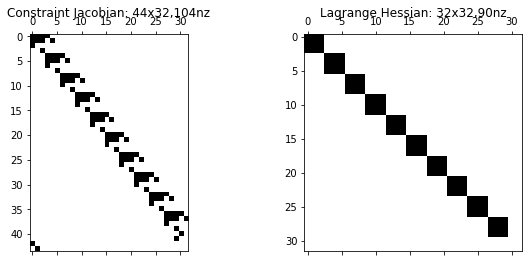

In [13]:
ocp.spy()

Post-processing. Sample states/control or expressions thereof on a specific grid:

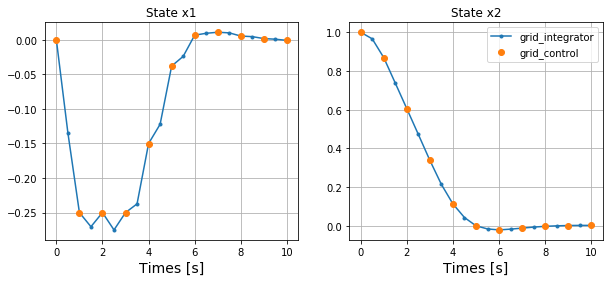

In [17]:
tsa, x1a = sol.sample(x1, grid='control')
tsa, x2a = sol.sample(x2, grid='control')

tsb, x1b = sol.sample(x1, grid='integrator')
tsb, x2b = sol.sample(x2, grid='integrator')

figure(figsize=(10, 4))
subplot(1, 2, 1)
plot(tsb, x1b, '.-')
plot(tsa, x1a, 'o')
xlabel("Times [s]", fontsize=14)
grid(True)
title('State x1')

subplot(1, 2, 2)
plot(tsb, x2b, '.-')
plot(tsa, x2a, 'o')
legend(['grid_integrator', 'grid_control'])
xlabel("Times [s]", fontsize=14)
title('State x2')
grid(True)

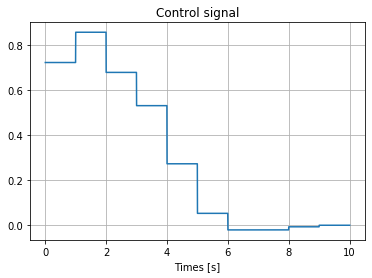

In [18]:
tsol, usol = sol.sample(u, grid='integrator',refine=100)

figure()
plot(tsol,usol)
title("Control signal")
xlabel("Times [s]")
grid(True)

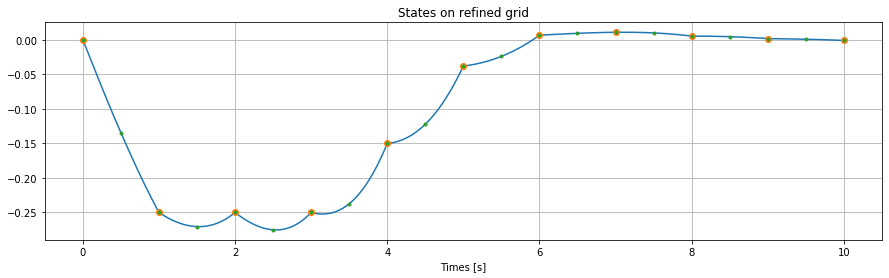

In [19]:
tsc, x1c = sol.sample(x1, grid='integrator', refine=100)

figure(figsize=(15, 4))
plot(tsc, x1c, '-')
plot(tsa, x1a, 'o')
plot(tsb, x1b, '.')
xlabel("Times [s]")
title("States on refined grid")
grid(True)